In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re 
from scipy import stats

import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('seaborn-poster')



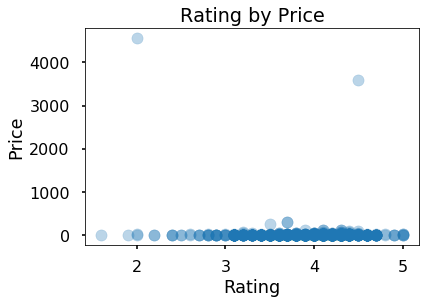

,category,brand,product,price,rating
0,Night Cream,Hada Labo,Perfect 3D Gel,6.37,3.8
1,Face Mist,PIXY,Aqua Beauty Protecting Mist,1.89,4.2
2,Night Cream,Wardah,Lightening Night Cream,0.00,3.5
3,Face Mist,Avene,Thermal Spring Water,13.93,4.4
4,Night Cream,Wardah,White Secret Night Cream,6.86,3.6


In [2]:
skincare_data = pd.read_csv("00. InfoProduct.csv")
#skincare_data = skincare_data['Reviewer'].drop()

skincare_data=skincare_data.drop(['Reviewer'], axis=1)

#lowercase column titles
new_colnames = [i.lower() for i in skincare_data.columns]
skincare_data=skincare_data.copy()
skincare_data.columns=new_colnames

#Price: Rp --> USD
skincare_data['price'] = skincare_data['price'].str.replace('Rp.', '')
skincare_data['price'] = skincare_data['price'].str.replace('.','')
skincare_data['price'] = skincare_data['price'].astype(float)
skincare_data["price"] = 0.00007 * skincare_data["price"]


#categorize columns by Category
#categorize by Merk
#rename merk --> brand
skincare_data = skincare_data.rename(columns = {"merk" : "brand"})
skincare_data = skincare_data.rename(columns = {"overallrating" : "rating"})
skincare_data.head()
#groupby brands
brands_group=skincare_data.groupby('brand')['rating'].mean()
#average ratings per Category/Merk
    #boxplots
    
#plot=skincare_data.boxplot('rating', by='brand')
plt.scatter(x=skincare_data['rating'],y=skincare_data["price"], alpha=0.3)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Rating by Price')
plt.show()
    
skincare_data.head()


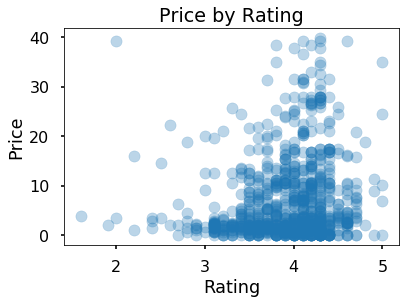

In [3]:
skincare_subset=skincare_data.loc[(skincare_data['price']<40)]
plt.scatter(x=skincare_subset['rating'],y=skincare_subset["price"], alpha=0.3)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Price by Rating')
plt.show()


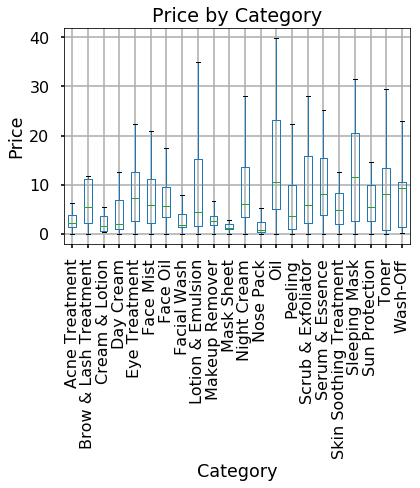

In [4]:
plot=skincare_subset.boxplot('price', by='category', rot=90)
skincare_data['category'].unique()
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Price by Category')
plt.suptitle('')
plt.show()

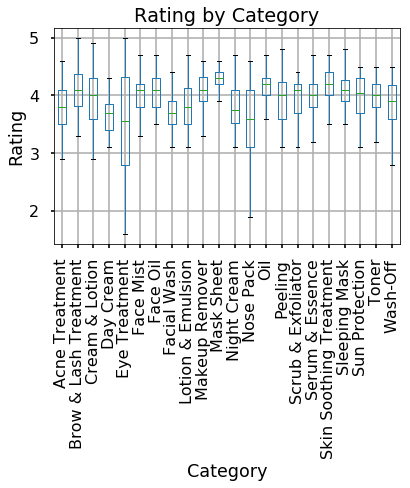

In [5]:
plot=skincare_subset.boxplot('rating', by='category', rot=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Rating by Category')
plt.suptitle('')
plt.show()

In [6]:
cosmetics = pd.read_csv("cosmetic.csv")
cosmetics.head()

,Label,URL,brand,name,price,rank,skin_type,ingredients
0,moisturizing-cream-oils-mists,https://www.sephora.com/product/creme-de-la-me...,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/facial-treatme...,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o..."
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-moisturizi...,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/your-skin-but-...,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...


In [7]:
col_lower = [i.lower() for i in cosmetics.columns]
cosmetics=cosmetics.copy()
cosmetics.columns=col_lower

In [8]:
cosmetics.head()

,label,url,brand,name,price,rank,skin_type,ingredients
0,moisturizing-cream-oils-mists,https://www.sephora.com/product/creme-de-la-me...,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/facial-treatme...,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o..."
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-moisturizi...,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/your-skin-but-...,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...


In [9]:
#drop url column
cosmetics=cosmetics.drop(['url'], axis=1)

In [10]:
for i in cosmetics['label']: 
    seperate = i.split("-",1) 
    final = seperate[0]
    cosmetics['label'] = final

cosmetics.head()




,label,brand,name,price,rank,skin_type,ingredients
0,sunscreen,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,sunscreen,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o..."
2,sunscreen,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...
3,sunscreen,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,sunscreen,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...


In [11]:
print(cosmetics.skin_type.unique())
unique_skin_list = ['Normal','Oily', 'Combination', 'Dry', 'Sensitive', 'Full', 'Natural', 'Matte', 'Light', 'Radiant']

["['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n', '✔ Dry\\n']"
 "['✔ Full\\n', '✔ Sensitive\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Natural\\n']"
 "['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n', '✔ Sensitive\\n']" '[]'
 "['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n']"
 "['✔ Normal\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Normal\\n', '✔ Combination\\n', '✔ Dry\\n']"
 "['✔ Normal\\n', '✔ Dry\\n']" "['✔ Combination\\n', '✔ Dry\\n']"
 "['✔ Oily\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Full\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Matte\\n']"
 "['✔ Normal\\n', '✔ Combination\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Oily\\n', '✔ Combination\\n']"
 "['✔ Medium\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Matte\\n']"
 "['✔ Full\\n', '✔ Sensitive\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Radiant\\n']"
 "

In [12]:
for x in unique_skin_list:
    cosmetics[x]=0

cosmetics.head()

,label,brand,name,price,rank,skin_type,ingredients,Normal,Oily,Combination,Dry,Sensitive,Full,Natural,Matte,Light,Radiant
0,sunscreen,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0,0,0,0,0,0
1,sunscreen,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",0,0,0,0,0,0,0,0,0,0
2,sunscreen,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,0,0,0,0,0,0,0,0,0,0
3,sunscreen,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",0,0,0,0,0,0,0,0,0,0
4,sunscreen,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,0,0,0,0,0,0,0,0,0,0


In [13]:
cosmetics['skin_type'] = cosmetics['skin_type'].astype(str)

In [14]:
count=-1
for x in cosmetics['skin_type']:
    count+=1
    for s_type in unique_skin_list:
        if s_type in x:
            cosmetics.loc[count,s_type]=1

            


In [15]:
cosmetics

,label,brand,name,price,rank,skin_type,ingredients,Normal,Oily,Combination,Dry,Sensitive,Full,Natural,Matte,Light,Radiant
0,sunscreen,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0
1,sunscreen,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0
2,sunscreen,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1,1,1,1,0,0,0,0,0,0
3,sunscreen,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0
4,sunscreen,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0
5,sunscreen,TATCHA,The Water Cream,$68.00,4.2,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-Japanese Wild Rose: Supports natural circulat...,1,1,1,0,1,0,0,0,0,0
6,sunscreen,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,$60.00,4.2,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-Blend of Six African Oils: Delivers intense h...,1,1,1,1,0,0,0,0,0,0
7,sunscreen,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,$72.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-Virgin Marula Oil: Helps nourish and rejuvena...,1,1,1,1,0,0,0,0,0,0
8,sunscreen,KIEHL'S SINCE 1851,Ultra Facial Cream,$29.50,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-Antarcticine (Glacial Glycoprotein Extract): ...,1,1,1,1,1,0,0,0,0,0
9,sunscreen,LA MER,Little Miss Miracle Limited-Edition Crème de l...,$325.00,5.0,[],"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0,0,0,0,0,0
